# EXAM FIN 687 Python in Finance
https://colab.research.google.com/drive/1TzmIEx_v7vo8n92GBmwxoWOhlaFobz--

Edit this cell by double clicking it. Then enter your name and student id number:

- Name: Siu Tsuen SIU
- Student ID: 1907098

## Submission guidelines

- After you solve the exercises, you have to hand in one ZIP file that contains two files:
  - The exported .ipynb file from Google Colab
  - The "printed" notebook as a PDF
  > Check the Outlook slides on Ilias if you need guidance on how to obtain the two files.
- Your notebook has to run in one single go from start to finish
  - Test this yourself by clicking on `Runtime` > `Restart session and run all` in the menu bar.
- Please call your files
  - FIN687\_Exam\_\<Lastname\>\_\<StudentID\>.zip
    - FIN687\_Exam\_\<Lastname\>\_\<StudentID\>.ipynb
    - FIN687\_Exam\_\<Lastname\>\_\<StudentID\>.pdf

- You have to submit your solutions electronically on the Ilias for examinations (where you downloaded the tasks). If you encounter any technical problems, please notify me immediately at sven.vahlpahl@uni-mannheim.de. If you cannot upload your solutions, please send them to me via email (but only then) before the deadline.


## General rules
- Add your name and student ID to the top of the notebook.
- Whether or not you follow good programming practices also affects the points you receive for each question. For example:
  - Structure your code clearly. Use text cells or comments to explain what your code does.
  - Use meaningful variable and file names.
  - Avoid unnecessary loops.
- Do not use any other software to (or manually) process the data besides Python.
- Use only the packages discussed in the lecture for regressions (`pyfixest`) and t-tests (`pingouin`).
- Variable names need to be unique within each problem.
- You have to solve the exam by yourself. You are not allowed to work in groups.
- Some tasks require some minimal interpretation of the results. In these cases, 1 or 2 sentences are enough.
- Whenever we refer to logarithms, we mean the natural logarithm.
- You are not allowed to use AI assistants to write finished code for you.
- Ensure your code runs from top to bottom by using **Restart session and run all**.
- Finally: Don't get overwhelmed. While there are many tasks, most of them can be solved with only a few lines of code. In fact, some of them even only require a single line.


## Packages and Imports

In [70]:
!pip install pyfixest pingouin pandas seaborn numpy great_tables requests scikit-learn matplotlib

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import great_tables as gt
import requests
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import pyfixest as pf
import pingouin as pg

## Problem 1: Fundamentals [5 points]

In [3]:
companies = ['ABC Corp.', 'Meta Platforms', 'Amazon Inc.', 'Tesla Motors']

In [4]:
numbers = [3.2, 4.5, 8.9, "missing", 6.7, None]


**Part a \[2 points\]**

Work with the provided variable `companies`.
- Make a new **tuple** that contains only company names that contain the letter `t` (case insensitive).

**Part b \[3 points\]**
- Go over each one of the values in the provided variable `numbers` and convert it to an integer. Store the results. If it's not possible, show an error message indicating the current iteration, but keep going through the rest of the values.

In [5]:
# Part a
t_names = tuple([company for company in companies if "t" in company.lower()])
t_names


('Meta Platforms', 'Tesla Motors')

In [6]:
# Part B
result =[]
iteration = 1
for item in (numbers):
    try: 
        result.append(int(item))
        iteration += 1
    except Exception as e:
        print(f"error in iteration {iteration}")
        iteration += 1

result
    

error in iteration 4
error in iteration 6


[3, 4, 8, 6]

## Problem 2: Data exploration [25 points]

In [7]:
# This dataset is shared with the next problem
!gdown 1QT1dQYvbfshOvAGJr1ACIjmI3e-UMYkG

Downloading...
From: https://drive.google.com/uc?id=1QT1dQYvbfshOvAGJr1ACIjmI3e-UMYkG
To: d:\OneDrive - Universität Mannheim\MMM\Pyfin\walmart.csv

  0%|          | 0.00/357k [00:00<?, ?B/s]
100%|██████████| 357k/357k [00:00<00:00, 23.9MB/s]


You have been provided with the dataset `walmart.csv`, which contains information about weekly sales at walmart, in addition to other datapoints.

Column Name   | Description
--------------|--------------------------------------------------
Store        | Store identification number
Date         | Sales week start date
Weekly_Sales | Weekly sales in USD
Holiday_Flag | Mark on the presence or absence of a holiday (1/0)
Temperature  | Air temperature in the region in Fahrenheit
Fuel_Price   | Fuel cost in the region in USD per gallon
CPI          | Consumer price index
Unemployment | Unemployment rate (0-100)


**Part a \[15 points\]**
- Ensure the date is parsed appropriately.
- Which data types are the columns?
- How many missing values are in each column?

**Part b \[10 points\]**
- Plot a seaborn pairplot for the data.
- Export it as a png picture without borders and high resolution.
- What is shown on the diagonal? What is shown on the off-diagonals?
- Look at the weekly_sales - store combination. Why are there these "strings" of points?


In [8]:
# Part a1
# Read csv
wm = pd.read_csv("walmart.csv", parse_dates=["date"]) 
wm["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
6435 non-null   object
dtypes: object(1)
memory usage: 50.4+ KB


In [9]:
# Part a1
# parse date didnt work, try another method
wm["date"]= pd.to_datetime(wm["date"], format="%d-%m-%Y")
wm["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6435 entries, 0 to 6434
Series name: date
Non-Null Count  Dtype         
--------------  -----         
6435 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 50.4 KB


In [10]:
# Part a2
# Check datatype of each column
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   object        
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 402.3+ KB


In [11]:
# Part a3
# Find missing values
wm.isna().sum()
# There are no missing values

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

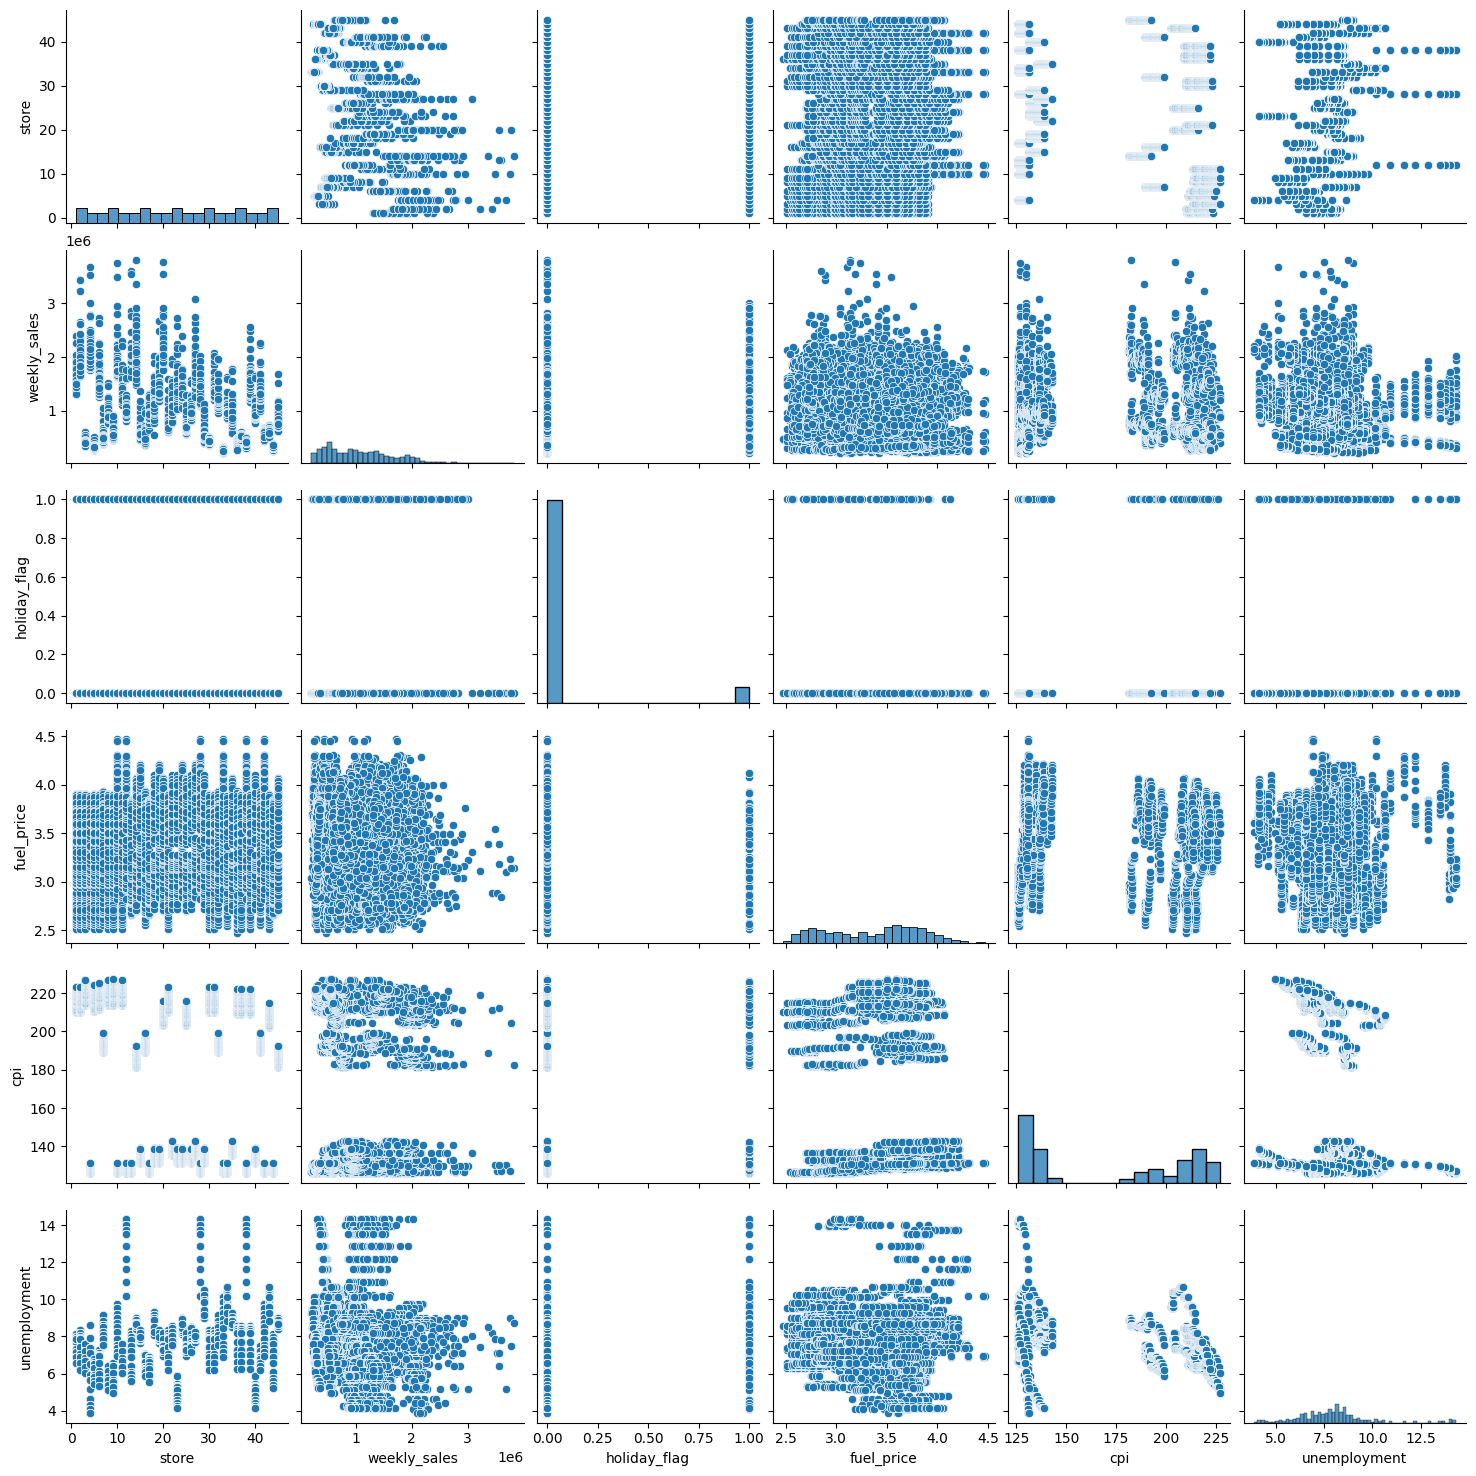

In [12]:
# Part b1
plot = sns.pairplot(data = wm)

In [13]:
# Part b2
plot.savefig("wm_plot",dpi=600, bbox_inches="tight") #600 dpi is print quality, high res

In [46]:
print("""Part b3
On diagonals: histogram showing the distribution of the variable,
Off diagonals: scatterplots showing the relationship between two variables

Part b4
The x-axis is the value of store identification number. Therefore, each dot on the same string represent the sales in the respective store. it is actually categorical data so they dont scatter.""")

Part b3
On diagonals: histogram showing the distribution of the variable,
Off diagonals: scatterplots showing the relationship between two variables

Part b4
The x-axis is the value of store identification number. Therefore, each dot on the same string represent the sales in the respective store. it is actually categorical data so they dont scatter.


## Problem 3: Analysis [60 points]

In [14]:
# This dataset is shared with the previous problem
!gdown 1QT1dQYvbfshOvAGJr1ACIjmI3e-UMYkG

Downloading...
From: https://drive.google.com/uc?id=1QT1dQYvbfshOvAGJr1ACIjmI3e-UMYkG
To: d:\OneDrive - Universität Mannheim\MMM\Pyfin\walmart.csv

  0%|          | 0.00/357k [00:00<?, ?B/s]
100%|██████████| 357k/357k [00:00<00:00, 22.9MB/s]


You have been provided with the dataset `walmart.csv`, which contains information about weekly sales at walmart, in addition to other datapoints.

Column Name   | Description
--------------|--------------------------------------------------
Store        | Store identification number
Date         | Sales week start date
Weekly_Sales | Weekly sales in USD
Holiday_Flag | Mark on the presence or absence of a holiday (1/0)
Temperature  | Air temperature in the region in Fahrenheit
Fuel_Price   | Fuel cost in the region in USD per gallon
CPI          | Consumer price index
Unemployment | Unemployment rate (0-100)

Please note: **Only use the regression and t-testing packages we used in the lecture!**


**Part a \[10 points\]**
- Convert the temperature to degrees Celsius, the fuel price to price per liter, and unemployment to a 0-1 percentage.
- Add last week's sales as a variable.
- Drop rows that have missing values.

Use the newly created variables in your regressions.

**Part b \[15 points\]**
- Take a look at the descriptive statistics below this cell labeled `Goal for part b`.
- Reproduce this table. Details matter.


**Part c \[10 points\]**
- Visualize the correlations between all numeric variables in a heatmap.
- Test whether the mean of the weekly_sales is significantly different between Decembers and Januaries for the store with identifier 4.

**Part d \[10 points\]**

Run regressions to answer the following research questions.

- (Code only) Is temperature related to the weekly sales, while controlling for last week's sales?
  - (Text only) Interpret your results: Is the temperature related to sales?
- (Code only) How do last week's sales, temperature, fuel prices, holidays, and unemployment rates collectively impact current weekly sales?
  - (Text only) Do the results seem intuitive to you? Why or why not.

**Part e \[15 points\]**

Run regressions to answer the following research questions (code only).
If you transform sales, also transform last week's sales.

1. What is the log-linear relationship between sales, accounting for the effect of previous week's sales, temperature, fuel prices, and unemployment rates?
2. In a log-linear model that accounts for store-specific and date-specific variations, how do previous week's sales, temperature, fuel prices, and unemployment rates relate to current weekly sales?
3. Show your results in a table. Rename the variables in the table to more natural names. Show the t statistic in the line underneath the coefficient.

Answer the following questions based on the model used in *2.* (text only):
4. Why can you not include holiday_flag?
5. Give two examples of potential factors we are capturing by controlling for store-specific variation.




In [58]:
wm = pd.read_csv("walmart.csv")
wm["date"]= pd.to_datetime(wm["date"], format="%d-%m-%Y")
twm = wm.copy()
# Part a1
# define funtion to convert
def to_float(value):
  try:
    return float(value)
  except ValueError:
    return np.nan # Return a NaN (not a number) to indicate a missing value


In [59]:
wm["temperature"] = wm["temperature"].apply(lambda x:to_float(x)) # first turn to float
wm["temperature"] = wm["temperature"].apply(lambda x: (x-32)*5/9) # then convert to fahrenheit
wm["fuel_price"] = wm["fuel_price"].apply(lambda x: x/3.78541) # convert fuel price per gallon to price per liter
wm["unemployment"] = wm["unemployment"].apply(lambda x: x/100) # convert unemployment to percentage 0-1
wm


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,2010-02-05,1643690.90,0,5.727778,0.679451,211.096358,0.08106
1,1,2010-02-12,1641957.44,1,3.616667,0.673111,211.242170,0.08106
2,1,2010-02-19,1611968.17,0,4.405556,0.664129,211.289143,0.08106
3,1,2010-02-26,1409727.59,0,8.127778,0.676545,211.319643,0.08106
4,1,2010-03-05,1554806.68,0,8.055556,0.693452,211.350143,0.08106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.266667,1.055896,192.013558,0.08684
6431,45,2012-10-05,733455.07,0,18.272222,1.052726,192.170412,0.08667
6432,45,2012-10-12,734464.36,0,12.483333,1.056689,192.327265,0.08667
6433,45,2012-10-19,718125.53,0,13.594444,1.048499,192.330854,0.08667


In [60]:
# part a2
wm["last_week_sales"] = wm["weekly_sales"][1:] #add last week sales column
print(f"there are{len(wm)} rows.")
wm #show last week sales as variable in dataframe

there are6435 rows.


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,last_week_sales
0,1,2010-02-05,1643690.90,0,5.727778,0.679451,211.096358,0.08106,NaN
1,1,2010-02-12,1641957.44,1,3.616667,0.673111,211.242170,0.08106,1641957.44
2,1,2010-02-19,1611968.17,0,4.405556,0.664129,211.289143,0.08106,1611968.17
3,1,2010-02-26,1409727.59,0,8.127778,0.676545,211.319643,0.08106,1409727.59
4,1,2010-03-05,1554806.68,0,8.055556,0.693452,211.350143,0.08106,1554806.68
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.266667,1.055896,192.013558,0.08684,713173.95
6431,45,2012-10-05,733455.07,0,18.272222,1.052726,192.170412,0.08667,733455.07
6432,45,2012-10-12,734464.36,0,12.483333,1.056689,192.327265,0.08667,734464.36
6433,45,2012-10-19,718125.53,0,13.594444,1.048499,192.330854,0.08667,718125.53


In [62]:
# part a3
wm = wm.dropna(how="any") #drop rows with na values
print(f"there are{len(wm)} rows.")
wm

there are6433 rows.


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,last_week_sales
1,1,2010-02-12,1641957.44,1,3.616667,0.673111,211.242170,0.08106,1641957.44
2,1,2010-02-19,1611968.17,0,4.405556,0.664129,211.289143,0.08106,1611968.17
3,1,2010-02-26,1409727.59,0,8.127778,0.676545,211.319643,0.08106,1409727.59
4,1,2010-03-05,1554806.68,0,8.055556,0.693452,211.350143,0.08106,1554806.68
5,1,2010-03-12,1439541.59,0,14.327778,0.704547,211.380643,0.08106,1439541.59
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.266667,1.055896,192.013558,0.08684,713173.95
6431,45,2012-10-05,733455.07,0,18.272222,1.052726,192.170412,0.08667,733455.07
6432,45,2012-10-12,734464.36,0,12.483333,1.056689,192.327265,0.08667,734464.36
6433,45,2012-10-19,718125.53,0,13.594444,1.048499,192.330854,0.08667,718125.53


In [63]:
# Part b
# Prepare the data
desc = wm.describe(percentiles=[0.025, .5, 0.975]).drop(columns=["store", "date", "holiday_flag", "last_week_sales"]).iloc[1:] #set up column and row info
desc = desc.iloc[[0,6,1,2,3,4,5]].reset_index() # sort the rows
desc["temperature"] = desc["temperature"].round(decimals=2).astype(str)+"degC" #add the celcius ending
desc = desc.rename(columns={"weekly_sales":"Sales", "temperature":"Temperature", "fuel_price":"Fuel Price", "cpi":"Consumer Price Index", "unemployment":"Unemployment Rate"}) #rename columns
desc

,index,Sales,Temperature,Fuel Price,Consumer Price Index,Unemployment Rate
0,mean,1.046980e+06,15.92degC,0.887264,171.578844,0.079983
1,std,5.643394e+05,10.25degC,0.121242,39.356194,0.018749
2,min,2.099862e+05,-18.92degC,0.653034,126.064000,0.038790
3,2.5%,2.809074e+05,-4.88degC,0.688327,126.149806,0.045840
4,50%,9.607460e+05,17.04degC,0.910073,182.616521,0.078740
5,97.5%,2.168053e+06,32.41degC,1.091559,223.903944,0.139750
6,max,3.818686e+06,37.86degC,1.180321,227.232807,0.143130


In [64]:
# put them in a nice table
gt_table = (
    gt.GT(desc)
    .tab_stub(rowname_col="index")
    .fmt_percent(
        columns=['Unemployment Rate'],
        decimals=1  # Number of decimal places
    )
    .fmt_units(
        columns=["Temperature"]
    )
    .fmt_number(
        columns=["Consumer Price Index"],
        decimals=1
    )
    .fmt_currency(
        columns=['Sales'],
        decimals=0  # Number of decimal places
    )
    .fmt_currency(
        columns=['Fuel Price'],
        decimals=2  # Number of decimal places
    )
    .tab_header(
        title="Descriptive Statistics",
        subtitle="Walmart Data Set"
    )
)
gt_table

GT(_tbl_data=   index         Sales Temperature  Fuel Price  Consumer Price Index  \
0   mean  1.046980e+06   15.92degC    0.887264            171.578844   
1    std  5.643394e+05   10.25degC    0.121242             39.356194   
2    min  2.099862e+05  -18.92degC    0.653034            126.064000   
3   2.5%  2.809074e+05   -4.88degC    0.688327            126.149806   
4    50%  9.607460e+05   17.04degC    0.910073            182.616521   
5  97.5%  2.168053e+06   32.41degC    1.091559            223.903944   
6    max  3.818686e+06   37.86degC    1.180321            227.232807   

   Unemployment Rate  
0           0.079983  
1           0.018749  
2           0.038790  
3           0.045840  
4           0.078740  
5           0.139750  
6           0.143130  , _body=<great_tables._gt_data.Body object at 0x0000027396188470>, _boxhead=Boxhead([ColInfo(var='index', type=<ColInfoTypeEnum.stub: 2>, column_label='index', column_align='left', column_width=None), ColInfo(var='Sales', type=<ColInfoTypeEnum.default: 1>, column_label='Sales', column_align='right', column_width=None), ColInfo(var='Temperature', type=<ColInfoTypeEnum.default: 1>, column_label='Temperature', column_align='left', column_width=None), ColInfo(var='Fuel Price', type=<ColInfoTypeEnum.default: 1>, column_label='Fuel Price', column_align='right', column_width=None), ColInfo(var='Consumer Price Index', type=<ColInfoTypeEnum.default: 1>, column_label='Consumer Price Index', column_align='right', column_width=None), ColInfo(var='Unemployment Rate', type=<ColInfoTypeEnum.default: 1>, column_label='Unemployment Rate', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000027396272030>, _spanners=Spanners([]), _heading=Heading(title='Descriptive Statistics', subtitle='Walmart Data Set', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000027394CD9CD0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x000002739426E870>, <great_tables._gt_data.FormatInfo object at 0x0000027394F9B710>, <great_tables._gt_data.FormatInfo object at 0x0000027394F9BD10>, <great_tables._gt_data.FormatInfo object at 0x00000273962729C0>, <great_tables._gt_data.FormatInfo object at 0x0000027396273050>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_borde

**Goal for part b**

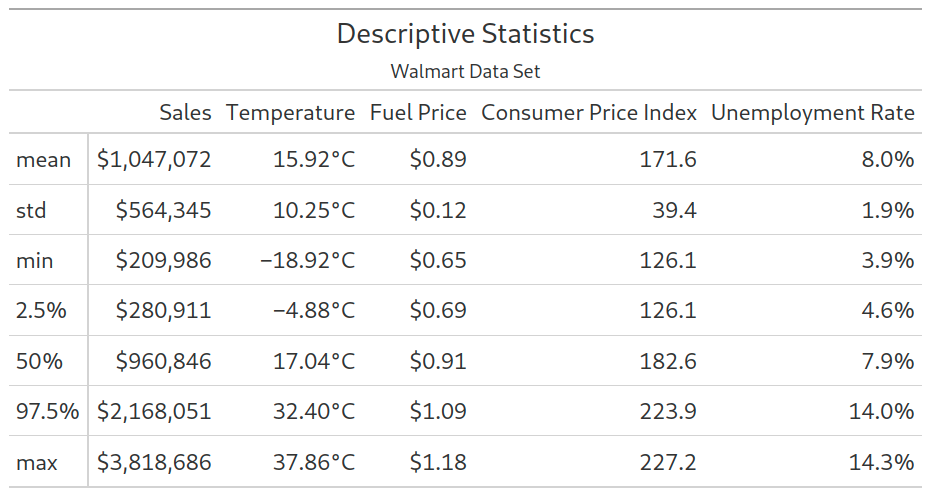

In [21]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6433 entries, 1 to 6434
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   store            6433 non-null   int64         
 1   date             6433 non-null   datetime64[ns]
 2   weekly_sales     6433 non-null   float64       
 3   holiday_flag     6433 non-null   int64         
 4   temperature      6433 non-null   float64       
 5   fuel_price       6433 non-null   float64       
 6   cpi              6433 non-null   float64       
 7   unemployment     6433 non-null   float64       
 8   last_week_sales  6433 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 502.6 KB


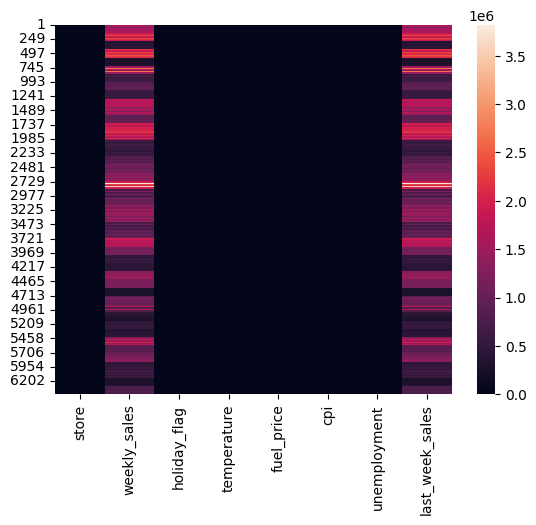

In [68]:
heatmap_df = wm.select_dtypes(include='number')
heatmap = sns.heatmap(data=heatmap_df)

In [74]:
#part c
# isolate date for store 4
store4 = wm.query("store == 4")
store4

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,last_week_sales
429,4,2010-02-05,2135143.87,0,6.533333,0.686319,126.442065,0.08623,2135143.87
430,4,2010-02-12,2188307.39,1,-1.755556,0.679715,126.496258,0.08623,2188307.39
431,4,2010-02-19,2049860.26,0,2.472222,0.670997,126.526286,0.08623,2049860.26
432,4,2010-02-26,1925728.84,0,5.200000,0.684206,126.552286,0.08623,1925728.84
433,4,2010-03-05,1971057.44,0,6.383333,0.701113,126.578286,0.08623,1971057.44
...,...,...,...,...,...,...,...,...,...
567,4,2012-09-28,2027620.23,0,22.077778,0.968455,131.043000,0.04077,2027620.23
568,4,2012-10-05,2209835.43,0,17.261111,0.956303,131.075667,0.03879,2209835.43
569,4,2012-10-12,2133026.07,0,13.950000,0.951812,131.108333,0.03879,2133026.07
570,4,2012-10-19,2097266.85,0,18.033333,0.953662,131.149968,0.03879,2097266.85


## Problem 4: Web scraping [30 points]

**Part a [20 points]**

How many glass baubles are offered by the manufacturer `Premier` on https://www.thechristmasshop.co.uk/c/for-the-tree/baubles/glass ?


**Part b [10 points]**

Plot a bar chart of the number of products per manufacturer sorted with the highest value on the left.

In [22]:
# Part a

#reference crul: curl "https://www.thechristmasshop.co.uk/api/v2/products?sort=position-asc&resultsPerPage=12&page=3&categoryId=54E0F9CE-412E-C831-31CB-0A0C05E0B8AA&locale=en_GB&shop=bt4873" --compressed -H "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:132.0) Gecko/20100101 Firefox/132.0" -H "Accept: application/json, text/plain, */*" -H "Accept-Language: en-US,en;q=0.5" -H "Accept-Encoding: gzip, deflate, br, zstd" -H "Connection: keep-alive" -H "Referer: https://www.thechristmasshop.co.uk/c/for-the-tree/baubles/glass?sort=position-asc&page=3" -H "Cookie: session_id=eyJjc3JmU2VjcmV0Ijoid2JvZ3U2aXZEQW84ZHZITzNhS2ZKNjBvIiwidW5peFRpbWVzdGFtcCI6MTczMjYyNzkxNTEwNn0=; session_id.sig=AP6SRNsvBQ5F6LCkEd-dLx6Q1nk; epCookieConsent=0" -H "Sec-Fetch-Dest: empty" -H "Sec-Fetch-Mode: cors" -H "Sec-Fetch-Site: same-origin" -H "TE: trailers"
#reference code from curl converter: 
# import requests

# cookies = {
#     'session_id': 'eyJjc3JmU2VjcmV0Ijoid2JvZ3U2aXZEQW84ZHZITzNhS2ZKNjBvIiwidW5peFRpbWVzdGFtcCI6MTczMjYyNzkxNTEwNn0=',
#     'session_id.sig': 'AP6SRNsvBQ5F6LCkEd-dLx6Q1nk',
#     'epCookieConsent': '0',
# }

# headers = {
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:132.0) Gecko/20100101 Firefox/132.0',
#     'Accept': 'application/json, text/plain, */*',
#     'Accept-Language': 'en-US,en;q=0.5',
#     # 'Accept-Encoding': 'gzip, deflate, br, zstd',
#     'Connection': 'keep-alive',
#     'Referer': 'https://www.thechristmasshop.co.uk/c/for-the-tree/baubles/glass?sort=position-asc&page=3',
#     # 'Cookie': 'session_id=eyJjc3JmU2VjcmV0Ijoid2JvZ3U2aXZEQW84ZHZITzNhS2ZKNjBvIiwidW5peFRpbWVzdGFtcCI6MTczMjYyNzkxNTEwNn0=; session_id.sig=AP6SRNsvBQ5F6LCkEd-dLx6Q1nk; epCookieConsent=0',
#     'Sec-Fetch-Dest': 'empty',
#     'Sec-Fetch-Mode': 'cors',
#     'Sec-Fetch-Site': 'same-origin',
#     # Requests doesn't support trailers
#     # 'TE': 'trailers',
# }

# params = {
#     'sort': 'position-asc',
#     'resultsPerPage': '12',
#     'page': '3',
#     'categoryId': '54E0F9CE-412E-C831-31CB-0A0C05E0B8AA',
#     'locale': 'en_GB',
#     'shop': 'bt4873',
# }

# response = requests.get('https://www.thechristmasshop.co.uk/api/v2/products', params=params, cookies=cookies, headers=headers)

In [23]:
#deleted unneccessary parts
params = {
    'sort': 'position-asc',
    'resultsPerPage': '100', #show 100 items per page
    'page': '1', #so we only 1 page
    'categoryId': '54E0F9CE-412E-C831-31CB-0A0C05E0B8AA',
    'locale': 'en_GB',
    'shop': 'bt4873',
}

response = requests.get('https://www.thechristmasshop.co.uk/api/v2/products', params=params)
print(response.status_code) #check connection
print (response.content) # get response conent

200
b'{"products":[{"productId":"5DAC907A-0924-B174-97AF-0A0C05B7F130","mainCategoryId":null,"name":"Santa Bauble","sku":"200016-1904","title":"Santa Bauble - The Christmas Shop","description":"<p>The Santa Bauble is a stunning addition to any Christmas tree. This 8cm (3\xc2\xbc inch) diameter red glass bauble is adorned with a beautiful historic image of \'Pere Noel\', a heartwarming 1904 painting of Father Christmas with Children. The image is printed on silk and elegantly framed with a border of gold thread, adding a touch of luxury to this festive decoration. The bauble also features gold glitter embellishments, giving it a shimmering and magical appearance. Each bauble is carefully crafted and made in the USA by Krebs Glas Lauscha, ensuring high quality and attention to detail. It comes packaged in a presentation box, making it a perfect gift or a special treat for yourself. Add a touch of nostalgia and elegance to your festive decor with the Santa Bauble.</p>","metaDescription":"

In [38]:
# load response to data frame
json_data_dict = json.loads(response.text)
df= pd.DataFrame(json_data_dict)
nested= pd.json_normalize(df["products"])
nested.head()


,productId,mainCategoryId,name,sku,title,description,metaDescription,additionalDescriptions,slug,deliveryPeriod,...,orderUnitInfo.minOrder,orderUnitInfo.intervalOrder,image.url,image.width,image.height,image.isZoomEnabled,strikePrice.taxType,strikePrice.formatted,strikePrice.amount,strikePrice.currency
0,5DAC907A-0924-B174-97AF-0A0C05B7F130,None,Santa Bauble,200016-1904,Santa Bauble - The Christmas Shop,<p>The Santa Bauble is a stunning addition to ...,This 8cm (3¼ inch) diameter red shiny glass ba...,[],santa-bauble,,...,1,1,/storage/images/image?remote=https%3A%2F%2Fwww...,1080,1080,True,NaN,NaN,NaN,NaN
1,5DAC947E-C8D6-7F24-19C8-0A0C05B7C488,None,Santa Bauble,200016-1908,Santa Bauble - The Christmas Shop,<p><span>8cm (3.25 inches) diameter glass baub...,,[],santa-bauble-3,,...,1,1,/storage/images/image?remote=https%3A%2F%2Fwww...,1080,1080,True,NaN,NaN,NaN,NaN
2,5DAC95CB-3C04-6054-FBE2-0A0C05B7F1C8,None,Santa Bauble,200016-1910,Santa Bauble - The Christmas Shop,<p>Add a touch of nostalgia and elegance to yo...,Add a touch of nostalgia and elegance to your ...,[],santa-bauble-4,,...,1,1,/storage/images/image?remote=https%3A%2F%2Fwww...,1080,1080,True,NaN,NaN,NaN,NaN
3,5DAC98F6-2281-593C-327D-0A0C05B8DC40,None,Santa Bauble,200016-1912,Santa Bauble - The Christmas Shop,<p><span>8cm (3.25 inches) diameter glass baub...,,[],santa-bauble-6,,...,1,1,/storage/images/image?remote=https%3A%2F%2Fwww...,1080,1080,True,NaN,NaN,NaN,NaN
4,5DAC9A0B-E1B1-9543-BCC8-0A0C05B88F9A,None,Santa Bauble,200016-1913,Santa Bauble - The Christmas Shop,<p>Enhance the beauty of your Christmas tree w...,,[],santa-bauble-7,,...,1,1,/storage/images/image?remote=https%3A%2F%2Fwww...,1080,1080,True,NaN,NaN,NaN,NaN


In [39]:
#find out how many products are produced by Premier
number = len(nested.query("manufacturer == 'Premier'"))
print(f"there are {number} baubles offered by Premier")

there are 3 baubles offered by Premier


In [25]:
# Part b
#create a new df containing the useful data
counts = nested["manufacturer"].value_counts().reset_index()
counts.columns = ["manufacturer", "Frequency"]
counts

,manufacturer,Frequency
0,Lauscha,40
1,Riffelmacher,6
2,Lighthome,4
3,Floralsilk,4
4,Gisela,3
5,Premier,3
6,Thuringer,2
7,Festive,2


<Axes: xlabel='manufacturer', ylabel='Frequency'>

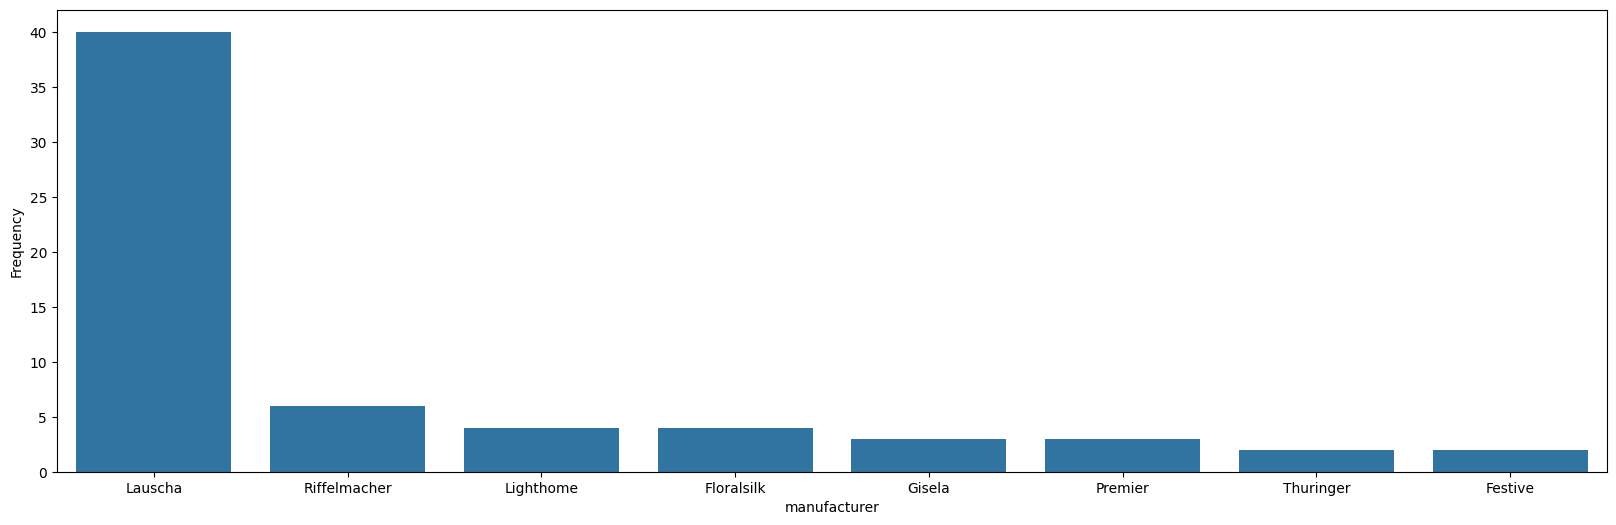

In [36]:
# plot the data
plt.figure(figsize=(20, 6))
sns.barplot(data = counts, x="manufacturer", y="Frequency")

## Problem 5: Machine learning [45 points]

In [27]:
!gdown 1O33a46bnmKC82jCJ6VV8z8sDVIot5XvK

Downloading...
From: https://drive.google.com/uc?id=1O33a46bnmKC82jCJ6VV8z8sDVIot5XvK
To: d:\OneDrive - Universität Mannheim\MMM\Pyfin\loans.csv

  0%|          | 0.00/380k [00:00<?, ?B/s]
100%|██████████| 380k/380k [00:00<00:00, 18.5MB/s]


You are provided with the dataset `loans.csv`, which contains information about borrowers and a target variable `loan_status`.

| Column Name | Description |
|------------|-------------|
| loan_id | Unique identifier for each loan application |
| no_of_dependents | Number of people dependent on the loan applicant |
| education | Education level of the loan applicant |
| self_employed | Whether the applicant is self-employed (Yes/No) |
| income_annum | Annual income of the applicant |
| loan_amount | Amount of loan requested |
| loan_term | Duration of the loan in months |
| credit_score | Credit score of the applicant |
| residential_assets_value | Value of residential assets owned by applicant |
| commercial_assets_value | Value of commercial assets owned by applicant |
| luxury_assets_value | Value of luxury assets owned by applicant |
| bank_asset_value | Value of assets held in bank accounts |
| loan_status | Status of the loan application (Approved/Rejected) |

Your goal is to build a model that predicts whether the loan should be approved or rejected.

Make sure you set a random state.

**Part a \[15 points\]**
- Is this a regression or a classification problem?
- Ensure you can use all features in your analysis.
- Split the data into 75% train, 25% data.

**Part b \[20 points\]**
- Select and train an appropriate model. Ensure you are not overfitting.
- Evaluate the model using the f1_score.
- Interpret your results.

**Part c \[10 points\]**
- Plot the feature importance in a sorted bar chart.
- Which feature is the most important one?

In [69]:
# Part a

print("this is a classification problem because there are 2 distinct values (approved or rejected)")

# split the data set to predictors and targets
RANDOM_STATE = 1111
loan = pd.read_csv("loans.csv")
loan["education"] = loan["education"].map({" Graduate": 1, " Not Graduate": 0}) #encode education status to binary values
loan["self_employed"] = loan["self_employed"].map({" Yes": 1, " No": 0})#encode employment status to binary values
loan["loan_status"] = loan["loan_status"].map({" Approved": 1, " Rejected": 0})#encode employment status to binary values

X = loan.drop(columns=["loan_status"])
y = loan["loan_status"]

# split the data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)


this is a classification problem because there are 2 distinct values (approved or rejected)
(3201, 12) (1068, 12)


In [72]:
loan #check values are correctly encoded

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [41]:
# Part b
# i will use decision tree classifier 
mdl = DecisionTreeClassifier(random_state=RANDOM_STATE)
mdl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1111)

In [31]:
# To evaluate model using f1 score
def train_and_evaluate(model, print_res = False,**kwargs):
    mdl = model(random_state=RANDOM_STATE, **kwargs)
    mdl.fit(X_train, y_train)
    train_eval = f1_score(y_train, mdl.predict(X_train))
    test_eval = f1_score(y_test, mdl.predict(X_test))
    if print_res == True:
        print(f"""Train f1 score: {train_eval:.4f}
Test f1 score: {test_eval:.4f}""")
    return mdl, train_eval, test_eval

<Axes: xlabel='max_depth'>

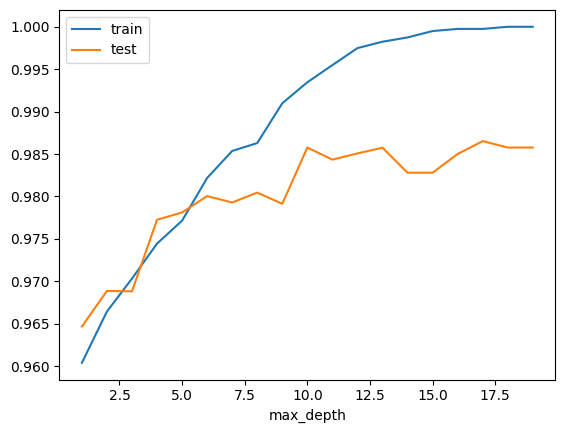

In [32]:
# To ensure no overfitting
results = []
for value in range(1,20):
  _, ins, oos = train_and_evaluate(
      DecisionTreeClassifier,
      max_depth=value,
      print_res=False
  )
  results.append({'max_depth': value, 'train': ins, 'test': oos})

res = pd.DataFrame(results).set_index('max_depth')
res.plot()

In [42]:
# From the graph, it seems that max depth should be around 10
eval = train_and_evaluate(DecisionTreeClassifier, max_depth = 10)
print(eval)

(DecisionTreeClassifier(max_depth=10, random_state=1111), 0.9934607645875252, 0.9857677902621723)


In [34]:
# part c
# create a df for feature importance 

importance = eval[0].feature_importances_
feature_name = X.columns

feat_importance = pd.DataFrame({"feature": feature_name,"importance": importance})

feat_importance = feat_importance.sort_values(by="importance", ascending=False).reset_index().drop(columns="index")
feat_importance

,feature,importance
0,credit_score,0.846830
1,loan_term,0.082069
2,loan_amount,0.033204
3,income_annum,0.021305
4,commercial_assets_value,0.009049
5,luxury_assets_value,0.007068
6,residential_assets_value,0.000475
7,loan_id,0.000000
8,no_of_dependents,0.000000
9,education,0.000000


credit score is overwhelmingly important


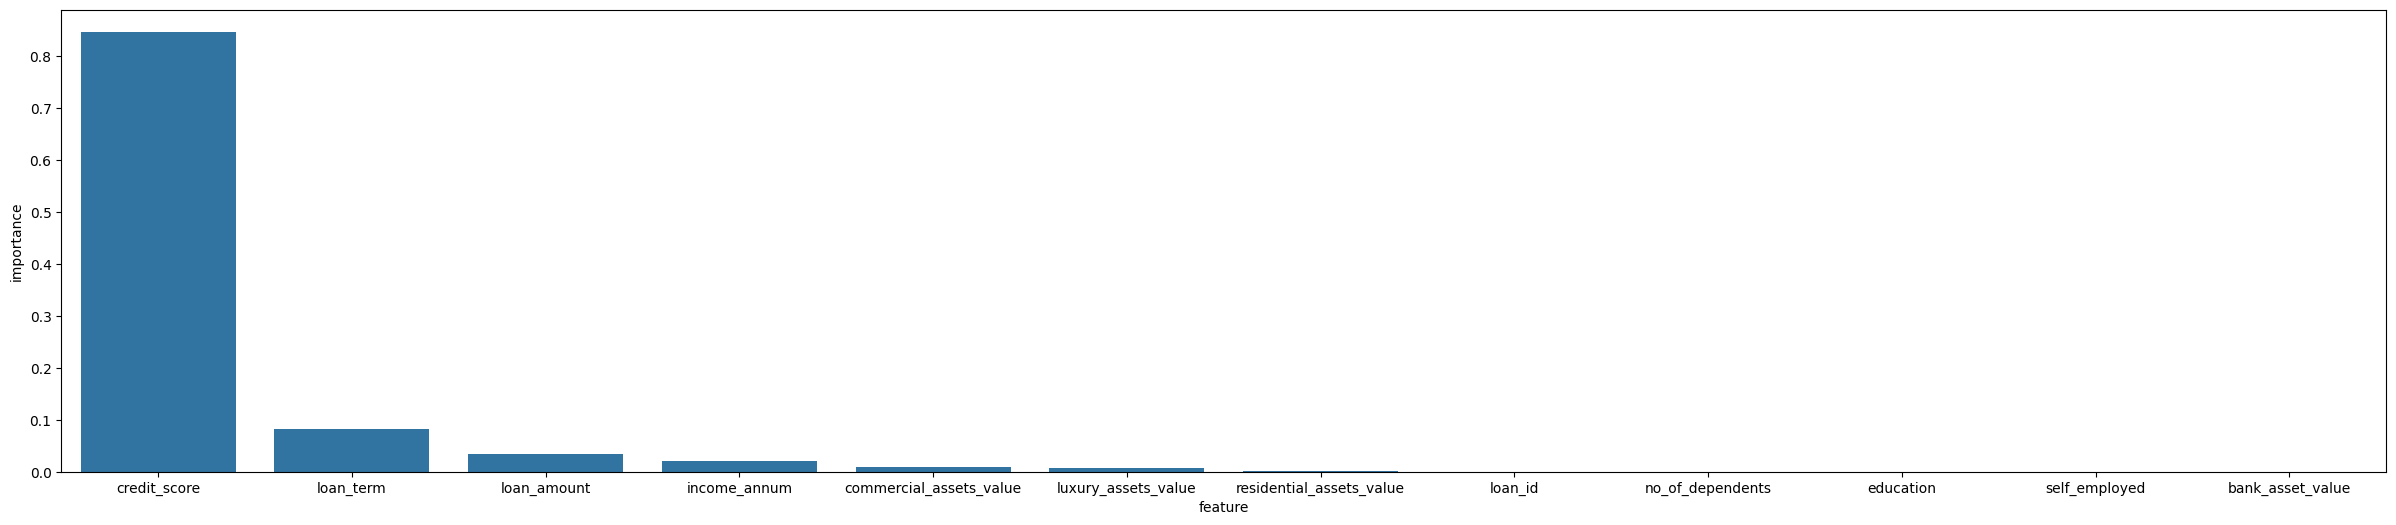

In [35]:
#plot the data
plt.figure(figsize=(30, 6))
sns.barplot(data=feat_importance, x="feature", y="importance", )
print("credit score is overwhelmingly important")